# Telco customer churn: EDA

El dataset está compuesto de la siguiente información:

*   **CustomerID**: A unique ID that identifies each customer.
*   **Gender**: The customer’s gender: Male, Female
*   **Age**: The customer’s current age, in years, at the time the fiscal quarter ended.
*   **Senior Citizen**: Indicates if the customer is 65 or older: Yes, No
*  **Married (Partner)**: Indicates if the customer is married: Yes, No  
*   **Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
*   **Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No
*   **Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
*   **Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
*   **Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
*   **Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
*   **Device Protection Plan**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
*   **Premium Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
*   **Streaming TV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
*   **Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
*   **Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
*   **Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No
*   **Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
*   **Monthly Charge**: Indicates the customer’s current total monthly charge for all their services from the company.
*   **Total Charges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
*   **Tenure**: Indicates the total amount of months that the customer has been with the company.
*   **Churn**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from skimpy import skim
%matplotlib inline                      

In [3]:
data = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Correct SeniorCitizen to Yes, No variable
data['SeniorCitizen'] = data["SeniorCitizen"].map({0 : 'No', 1 : 'Yes'})

In [5]:
# Shape
print("We have", data.shape[0], "rows and", data.shape[1], "columns in this dataset.")

We have 7043 rows and 21 columns in this dataset.


In [6]:
# Get info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Correct data type
data = data.replace(" ", np.nan)
data.TotalCharges = pd.to_numeric(data.TotalCharges)

In [8]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7043   │ │ string      │ 18    │                                                          │
│ │ Number of columns │ 21     │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25    ┃ p75     ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ tenure                 │    0 │       0 │      32 │      25 │    0 │      9 │      55 │      72 │  █▄▃▃▃▆  │  │
│ │ MonthlyCharges         │    0 │       0 │      65 │      30 │   18 │     36 │      90 │     120 │  █▃▄▇▇▃  │  │
│ │ TotalCharges           │   11 │    0.16 │    2300 │    2300 │   19 │    400 │    3800 │    8700 │  █▃▂▂▁▁  │  │
│ └────────────────────────┴──────┴─────────┴─────────┴─────────┴──────┴────────┴─────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ customerID                       │      0 │         0 │                          1 │                  7000 │  │
│ │ gender                           │      0 │         0 │                          1 │                  7000 │  │
│ │ SeniorCitizen                    │      0 │         0 │                          1 │                  7000 │  │
│ │ Partner                          │      0 │         0 │                          1 │                  7000 │  │
│ │ Dependents                       │      0 │         0 │                          1 │                  7000 │  │
│ │ PhoneService                     │      0 │         0 │                          1 │                  7000 │  │
│ │ MultipleLines                    │      0 │         0 │                          1 │                  7000 │  │
│ │ InternetService                  │      0 │         0 │                          1 │                  7000 │  │
│ │ OnlineSecurity                   │      0 │         0 │                          1 │                  7000 │  │
│ │ OnlineBackup                     │      0 │         0 │                          1 │                  7000 │  │
│ │ DeviceProtection                 │      0 │         0 │                          1 │                  7000 │  │
│ │ TechSupport                      │      0 │         0 │                          1 │                  7000 │  │
│ │ StreamingTV                      │      0 │         0 │                          1 │                  7000 │  │
│ │ StreamingMovies                  │      0 │         

In [9]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043,2,No,5901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Null values count
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# Impute null values in TotalCharges with the mean
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Porcentaje de Churn:  26.54 %  --> (1869 clientes)
Porcentaje de Non_Churn: 73.46  %  --> (5174 clientes)


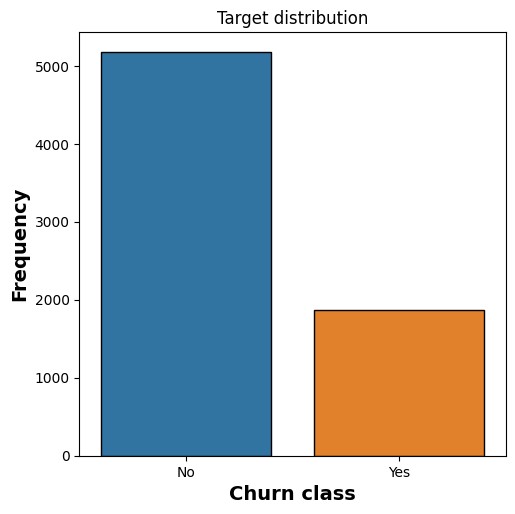

In [12]:
# Target
y = data['Churn']
print(f'Porcentaje de Churn:  {round(y.value_counts(normalize=True)[1]*100,2)} %  --> ({y.value_counts()[1]} clientes)')
print(f'Porcentaje de Non_Churn: {round(y.value_counts(normalize=True)[0]*100,2)}  %  --> ({y.value_counts()[0]} clientes)')

plt.figure(figsize=(5.5, 5.5))
sns.countplot(x = "Churn" , data = data, edgecolor = "black")

plt.xlabel('Churn class', fontsize = 14, fontweight = "bold")
plt.ylabel('Frequency', fontsize = 14, fontweight = "bold")
plt.title('Target distribution')
plt.show()

In [13]:
# Mapping target column to a binnary class
data["Churn"] = data['Churn'].map({'Yes':1, 'No': 0})

In [14]:
numerical= data.select_dtypes(include = 'number').columns

categorical = data.select_dtypes(include = 'object').columns

print(f'Variables Numericas:  {data[numerical].columns.tolist()}')
print('\n')
print(f'Variables Categoricas: {data[categorical].columns.tolist()}')

Variables Numericas:  ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


Variables Categoricas: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


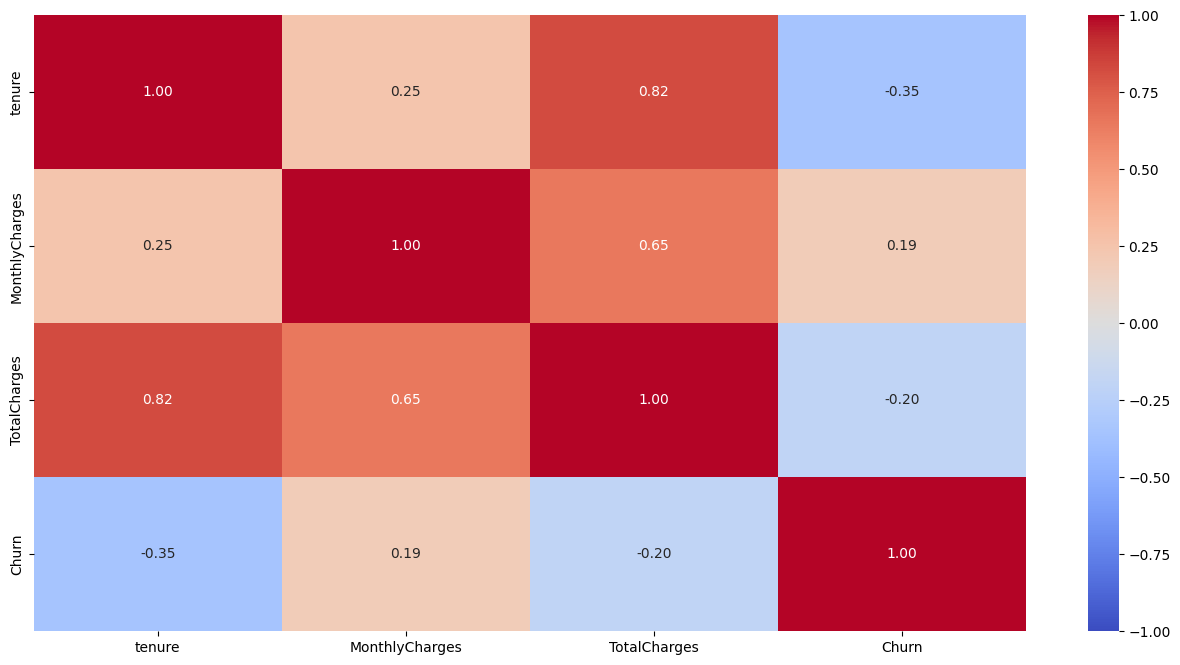

In [15]:
# Variables numéricas
plt.figure(figsize=(16, 8))
sns.heatmap (data[numerical].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm');

Se observan variables colineales: tenure/TotalCharges, MonthlyCharges/TotalCharges

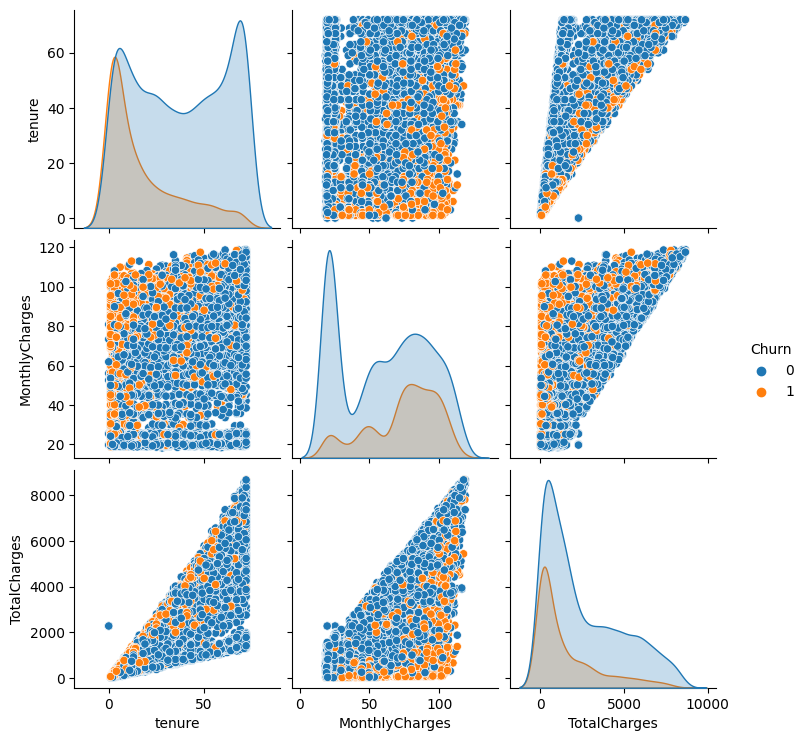

In [16]:
sns.pairplot(data[numerical], hue="Churn")

plt.show()

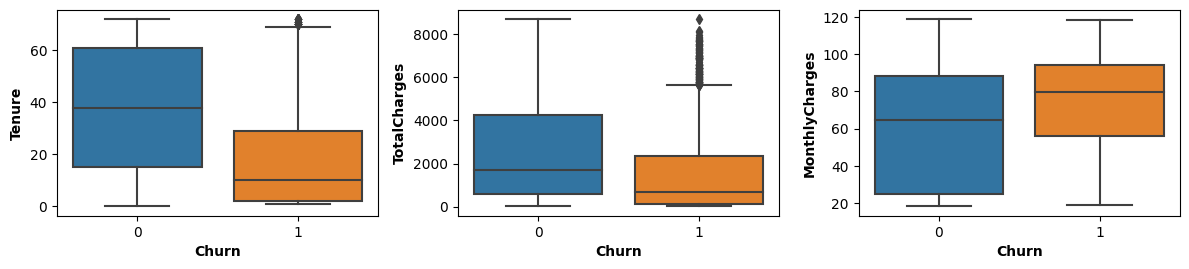

In [26]:
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(2, 3 ,1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)

sns.boxplot(data=data, x= "Churn", y = "tenure", ax=ax1)
sns.boxplot(data=data, x= "Churn", y="TotalCharges", ax=ax2)
sns.boxplot(data=data, x= "Churn", y="MonthlyCharges", ax=ax3)

# Set bold font type to xlabel
ax1.set_xlabel("Churn", fontweight="bold")
ax1.set_ylabel("Tenure", fontweight="bold")

ax2.set_xlabel("Churn", fontweight="bold")
ax2.set_ylabel("TotalCharges", fontweight="bold")

ax3.set_xlabel("Churn", fontweight="bold")
ax3.set_ylabel("MonthlyCharges", fontweight="bold")

plt.tight_layout()
plt.show()

In [61]:
# Variables categoricas
data[categorical].nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
dtype: int64

In [62]:
for column in data[categorical]:
    print(f"{column}: {data[column].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: ['No' 'Yes']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


# Variable comparative analysis

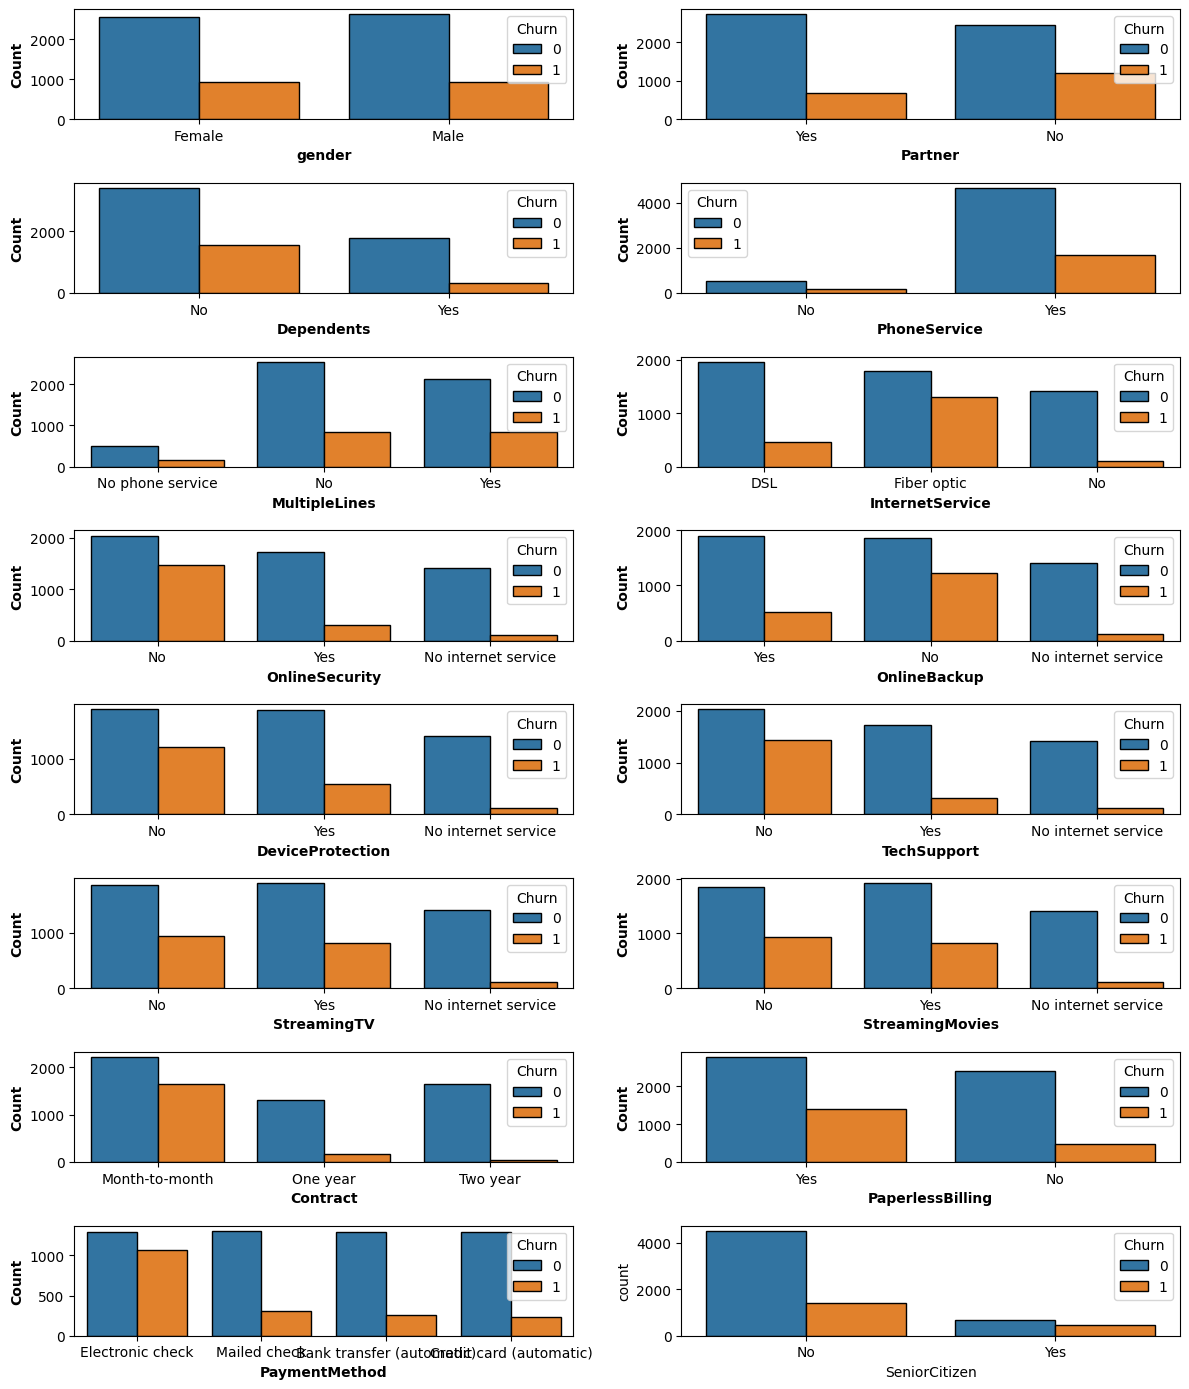

In [64]:
fig = plt.figure(figsize=(12, 14))

ax1 = fig.add_subplot(8, 2 ,1)
ax2 = fig.add_subplot(8, 2, 2)
ax3 = fig.add_subplot(8, 2, 3)
ax4 = fig.add_subplot(8, 2, 4)
ax5 = fig.add_subplot(8, 2, 5)
ax6 = fig.add_subplot(8, 2, 6)
ax7 = fig.add_subplot(8, 2, 7)
ax8 = fig.add_subplot(8, 2, 8)
ax9 = fig.add_subplot(8, 2, 9)
ax10 = fig.add_subplot(8, 2, 10)
ax11 = fig.add_subplot(8, 2, 11)
ax12 = fig.add_subplot(8, 2, 12)
ax13 = fig.add_subplot(8, 2, 13)
ax14 = fig.add_subplot(8, 2, 14)
ax15 = fig.add_subplot(8, 2, 15)
ax16 = fig.add_subplot(8, 2, 16)


sns.countplot(data = data, x = "gender",           hue="Churn", ax=ax1,   edgecolor = "black")
sns.countplot(data = data, x = "Partner",          hue="Churn", ax=ax2,   edgecolor = "black")
sns.countplot(data = data, x = "Dependents",       hue="Churn", ax=ax3,   edgecolor = "black")
sns.countplot(data = data, x = "PhoneService",     hue="Churn", ax=ax4,   edgecolor = "black")
sns.countplot(data = data, x = "MultipleLines",    hue="Churn", ax=ax5,   edgecolor = "black")
sns.countplot(data = data, x = "InternetService",  hue="Churn", ax=ax6,   edgecolor = "black")
sns.countplot(data = data, x = "OnlineSecurity",   hue="Churn", ax=ax7,   edgecolor = "black")
sns.countplot(data = data, x = "OnlineBackup",     hue="Churn", ax=ax8,   edgecolor = "black")
sns.countplot(data = data, x = "DeviceProtection", hue="Churn", ax=ax9,   edgecolor = "black")
sns.countplot(data = data, x = "TechSupport",      hue="Churn", ax=ax10,  edgecolor = "black")
sns.countplot(data = data, x = "StreamingTV",      hue="Churn", ax=ax11,  edgecolor = "black")
sns.countplot(data = data, x = "StreamingMovies",  hue="Churn", ax =ax12, edgecolor = "black")
sns.countplot(data = data, x = "Contract",         hue="Churn", ax =ax13, edgecolor = "black")
sns.countplot(data = data, x = "PaperlessBilling", hue="Churn", ax =ax14, edgecolor = "black")
sns.countplot(data = data, x = "PaymentMethod",    hue="Churn", ax =ax15, edgecolor="black")
sns.countplot(data = data, x = "SeniorCitizen", hue = "Churn", ax = ax16, edgecolor = "black")

# Set bold font type to xlabel
ax1.set_xlabel("gender", fontweight="bold")
ax1.set_ylabel("Count", fontweight="bold")

ax2.set_xlabel("Partner", fontweight="bold")
ax2.set_ylabel("Count", fontweight="bold")

ax3.set_xlabel("Dependents", fontweight="bold")
ax3.set_ylabel("Count", fontweight="bold")

ax4.set_xlabel("PhoneService", fontweight="bold")
ax4.set_ylabel("Count", fontweight="bold")

ax5.set_xlabel("MultipleLines", fontweight="bold")
ax5.set_ylabel("Count", fontweight="bold")

ax6.set_xlabel("InternetService", fontweight="bold")
ax6.set_ylabel("Count", fontweight="bold")

ax7.set_xlabel("OnlineSecurity", fontweight="bold")
ax7.set_ylabel("Count", fontweight="bold")

ax8.set_xlabel("OnlineBackup", fontweight="bold")
ax8.set_ylabel("Count", fontweight="bold")

ax9.set_xlabel("DeviceProtection", fontweight="bold")
ax9.set_ylabel("Count", fontweight="bold")

ax10.set_xlabel("TechSupport", fontweight="bold")
ax10.set_ylabel("Count", fontweight="bold")

ax11.set_xlabel("StreamingTV", fontweight="bold")
ax11.set_ylabel("Count", fontweight="bold")

ax12.set_xlabel("StreamingMovies", fontweight="bold")
ax12.set_ylabel("Count", fontweight="bold")

ax13.set_xlabel("Contract", fontweight="bold")
ax13.set_ylabel("Count", fontweight="bold")

ax14.set_xlabel("PaperlessBilling", fontweight="bold")
ax14.set_ylabel("Count", fontweight="bold")

ax15.set_xlabel("PaymentMethod", fontweight="bold")
ax15.set_ylabel("Count", fontweight="bold")

plt.tight_layout()
plt.show()